# Importing necessary packages

In [1]:
import warnings
warnings.simplefilter('ignore')
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error

<h4>Reading the csv using pandas</h4>

In [2]:
import pandas as pd

train_data = pd.read_csv("../Train.csv")

In [3]:
train_data.shape

(8529, 12)

In [4]:
train_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,100000.00,Low Fat,0.016047,Dairy,2.508092e+02,OUT049,1999,Medium,Tier 1,Supermarket Type1,3736.1380
1,FDA15,100000.00,Low Fat,0.016047,Dairy,2.500000e+08,OUT049,1999,Medium,Tier 1,Supermarket Type1,3736.1380
2,FDA15,9.30,Low Fat,0.016047,Dairy,2.498092e+02,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
3,DRC01,5.92,Regular,0.019278,Soft Drinks,4.826920e+01,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
4,FDN15,17.50,Low Fat,0.016760,Meat,1.416180e+02,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700


<h4>Observing the columns and their datatypes</h4>

In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8529 entries, 0 to 8528
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8529 non-null   object 
 1   Item_Weight                7066 non-null   float64
 2   Item_Fat_Content           8529 non-null   object 
 3   Item_Visibility            8529 non-null   float64
 4   Item_Type                  8529 non-null   object 
 5   Item_MRP                   8529 non-null   float64
 6   Outlet_Identifier          8529 non-null   object 
 7   Outlet_Establishment_Year  8529 non-null   int64  
 8   Outlet_Size                6119 non-null   object 
 9   Outlet_Location_Type       8529 non-null   object 
 10  Outlet_Type                8529 non-null   object 
 11  Item_Outlet_Sales          8529 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.7+ KB


<h4>Handling Outliers</h4>

In [6]:
train_data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7066.000000,8529.000000,8.529000e+03,8529.000000,8529.000000
mean,41.775531,0.066092,3.622032e+04,1997.829640,2181.187420
std,1682.330377,0.051602,2.776879e+06,8.372173,1706.372867
min,4.555000,0.000000,3.129000e+01,1985.000000,33.290000
25%,8.775000,0.026950,9.384360e+01,1987.000000,833.581600
50%,12.600000,0.053887,1.430470e+02,1999.000000,1794.331000
75%,16.850000,0.094549,1.857582e+02,2004.000000,3101.296400
max,100000.000000,0.328391,2.500000e+08,2009.000000,13086.964800


In [7]:
from numpy import percentile
data = np.array(train_data.Item_MRP)

q25 , q75 = percentile(data,25) , percentile(data,75)

IQR = q75-q25

cut_off = IQR * 2
# print(cut_off)
upper = q75 + cut_off
# print(upper)
outliers = [x for x in data if x>upper]
print(outliers)

for i in range(len(outliers)):
    index = train_data[train_data.Item_MRP == outliers[i]].index
    train_data = train_data.drop(index)

[250000000.8092, 530000.8614, 57190901.6588]


In [8]:
train_data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7063.000000,8526.000000,8526.000000,8526.000000,8526.000000
mean,27.449572,0.066112,141.009455,1997.832043,2181.359736
std,1190.025794,0.051600,62.294604,8.371993,1706.425536
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.775000,0.026968,93.817950,1987.000000,833.914500
50%,12.600000,0.053923,143.014100,1999.000000,1794.331000
75%,16.850000,0.094563,185.684500,2004.000000,3101.296400
max,100000.000000,0.328391,266.888400,2009.000000,13086.964800


<h4>Handling missing data</h4>

In [9]:
train_data.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [10]:
train_data = train_data.dropna(axis=1)

In [11]:
train_data.shape

(8526, 10)

In [12]:
train_data.isnull().sum()

Item_Identifier              0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

<h4>Handling Duplicate data</h4>

In [13]:
if len(train_data[train_data.duplicated()]) != 0 : 
    print(train_data[train_data.duplicated()])
    train_data.drop_duplicates(inplace=True)
    print("Duplicates have been dropped")
    
else:
    print("No Duplicates")

   Item_Identifier Item_Fat_Content  Item_Visibility    Item_Type  Item_MRP  \
10           FDO10          Regular         0.012741  Snack Foods   57.6588   
38           FDP33          Low Fat         0.000000  Snack Foods  256.6672   

   Outlet_Identifier  Outlet_Establishment_Year Outlet_Location_Type  \
10            OUT013                       1987               Tier 3   
38            OUT018                       2009               Tier 3   

          Outlet_Type  Item_Outlet_Sales  
10  Supermarket Type1           343.5528  
38  Supermarket Type2          3068.0064  
Duplicates have been dropped


In [14]:
train_data.head()

,Item_Identifier,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,Low Fat,0.016047,Dairy,250.8092,OUT049,1999,Tier 1,Supermarket Type1,3736.1380
2,FDA15,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Tier 1,Supermarket Type1,3735.1380
3,DRC01,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Tier 3,Supermarket Type2,443.4228
4,FDN15,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Tier 1,Supermarket Type1,2097.2700
5,FDX07,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Tier 3,Grocery Store,732.3800


<h4>Handling Typos</h4>

In [15]:
train_data.Item_Fat_Content.unique()

train_data['Item_Fat_Content'] = train_data['Item_Fat_Content'].replace({'LF':'Low Fat',
                                                             'reg':'Regular',
                                                             'low fat':'Low Fat'})
print (train_data['Item_Fat_Content'].value_counts())

Low Fat    5518
Regular    3006
Name: Item_Fat_Content, dtype: int64


In [16]:
train_data.to_csv('./Data/cleaned_train.csv',index=False)

In [17]:
train_data = pd.read_csv("./Data/cleaned_train.csv")

In [18]:
train_data.describe()

,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8524.000000,8524.000000,8524.000000,8524.000000
mean,0.066126,141.005665,1997.832004,2181.471322
std,0.051598,62.282772,8.371279,1706.482603
min,0.000000,31.290000,1985.000000,33.290000
25%,0.026985,93.835050,1987.000000,834.580300
50%,0.053928,143.014100,1999.000000,1794.331000
75%,0.094576,185.668700,2004.000000,3101.296400
max,0.328391,266.888400,2009.000000,13086.964800


In [19]:
train_data.Item_Fat_Content.value_counts()

Low Fat    5518
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [20]:
train_data.Item_Type.value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     683
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

In [21]:
train_data.Outlet_Type.value_counts()

Supermarket Type1    5578
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

In [22]:
train_data.Outlet_Location_Type.value_counts()

Tier 3    3350
Tier 2    2785
Tier 1    2389
Name: Outlet_Location_Type, dtype: int64

Text(0.5, 1.0, 'Item_Outlet_sales_Distribution')

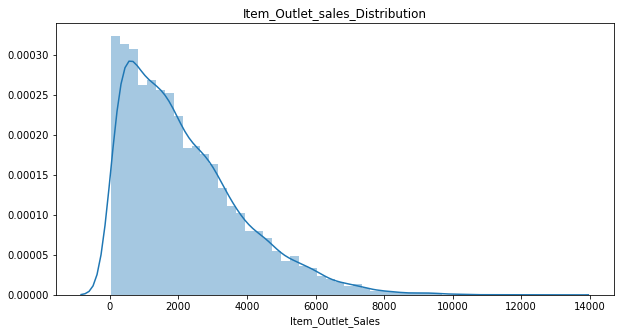

In [23]:
plt.figure(figsize=(10,5))
sns.distplot(train_data.Item_Outlet_Sales)
plt.title("Item_Outlet_sales_Distribution")

In [29]:
numeric_columns = train_data.select_dtypes(include=[np.number])
numeric_columns.columns

Index(['Item_Visibility', 'Item_MRP', 'Outlet_Establishment_Year',
       'Item_Outlet_Sales'],
      dtype='object')

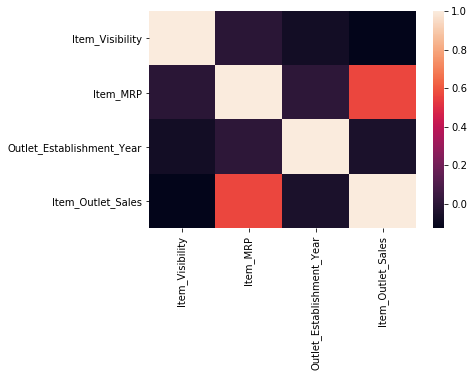

In [30]:
numeric_columns = train_data.select_dtypes(include=[np.number])
sns.heatmap(numeric_columns.corr())

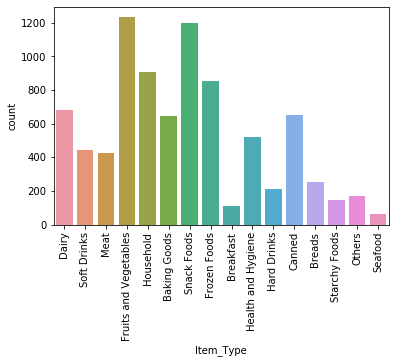

In [31]:
plt.xticks(rotation=90)
sns.countplot(train_data.Item_Type)
plt.show()

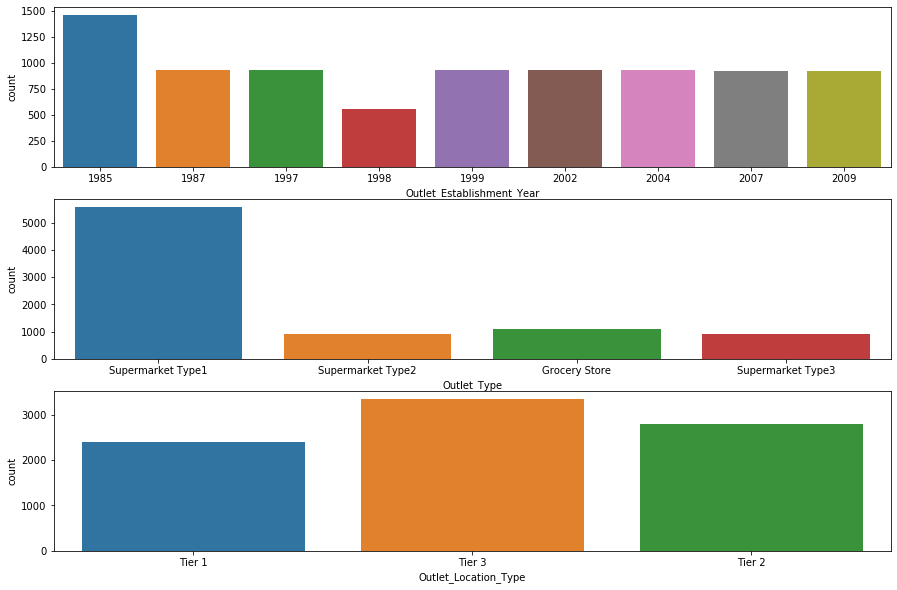

In [32]:
fig, axes = plt.subplots(3,1,figsize=(15,10))

sns.countplot(train_data.Outlet_Establishment_Year,ax=axes[0])
sns.countplot(train_data.Outlet_Type,ax=axes[1])
sns.countplot(train_data.Outlet_Location_Type,ax=axes[2])

plt.show()

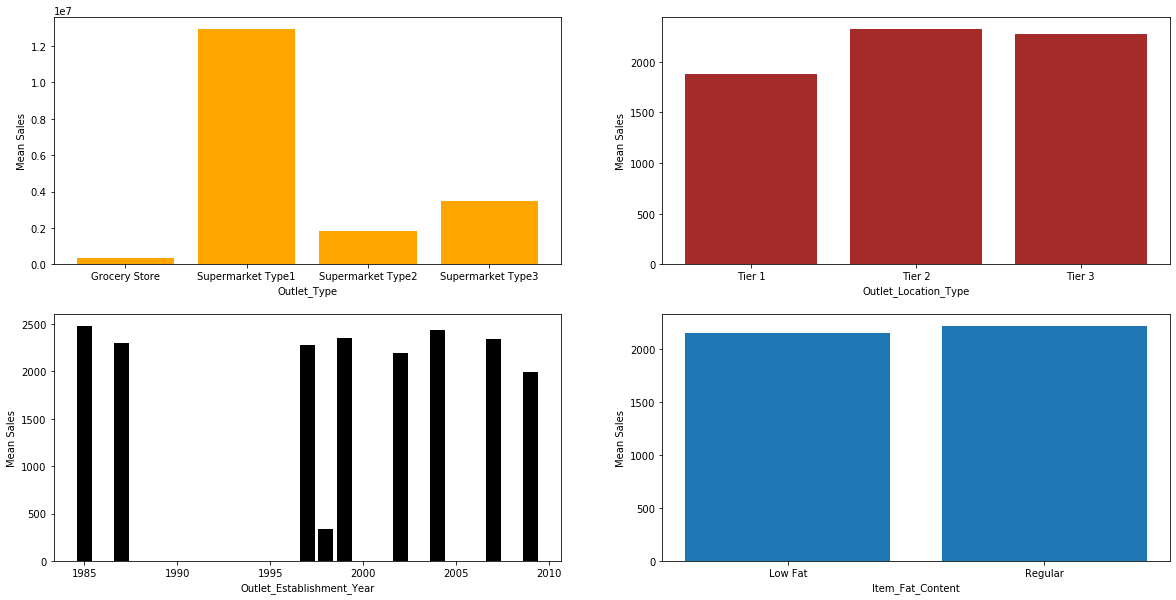

In [33]:
fig, axes = plt.subplots(2,2,figsize=(20,10))

out_type = train_data.groupby(["Outlet_Type"]).Item_Outlet_Sales.sum().reset_index()
axes[0][0].bar(out_type.Outlet_Type,out_type.Item_Outlet_Sales,color="orange")
# axes[0][0].xticks(rotation=90)
axes[0][0].set_xlabel("Outlet_Type")
axes[0][0].set_ylabel("Mean Sales")

loc_type = train_data.groupby(["Outlet_Location_Type"]).Item_Outlet_Sales.mean().reset_index()
axes[0][1].bar(loc_type.Outlet_Location_Type,loc_type.Item_Outlet_Sales,color="brown")
axes[0][1].set_xlabel("Outlet_Location_Type")
axes[0][1].set_ylabel("Mean Sales")

establish = train_data.groupby(["Outlet_Establishment_Year"]).Item_Outlet_Sales.mean().reset_index()
axes[1][0].bar(establish.Outlet_Establishment_Year,establish.Item_Outlet_Sales,color="black")
axes[1][0].set_xlabel("Outlet_Establishment_Year")
axes[1][0].set_ylabel("Mean Sales")

fats = train_data.groupby(["Item_Fat_Content"]).Item_Outlet_Sales.mean().reset_index()
axes[1][1].bar(fats.Item_Fat_Content,fats.Item_Outlet_Sales)
axes[1][1].set_xlabel("Item_Fat_Content")
axes[1][1].set_ylabel("Mean Sales")

plt.show()

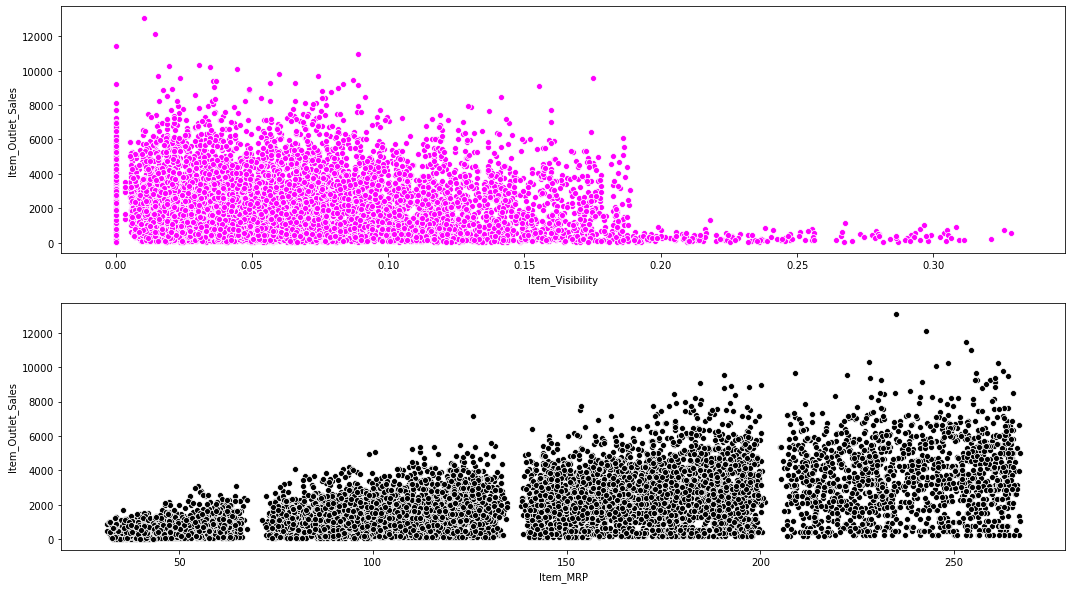

In [34]:
fig,axes=plt.subplots(2,1,figsize=(18,10))

sns.scatterplot(x='Item_Visibility',y='Item_Outlet_Sales',data=train_data,ax = axes[0], color = "magenta")

sns.scatterplot(x='Item_MRP',y='Item_Outlet_Sales',data=train_data,ax = axes[1], color = "black")

plt.show()

In [35]:
train_data.Item_Identifier=train_data.Item_Identifier.astype('category')
train_data.Item_Fat_Content=train_data.Item_Fat_Content.astype('category')
train_data.Item_Type=train_data.Item_Type.astype('category')
train_data.Outlet_Identifier=train_data.Outlet_Identifier.astype('category')
train_data.Outlet_Establishment_Year=train_data.Outlet_Establishment_Year.astype('int64')

train_data.Outlet_Type=train_data.Outlet_Type.astype('category')
train_data.Outlet_Location_Type=train_data.Outlet_Location_Type.astype('category')

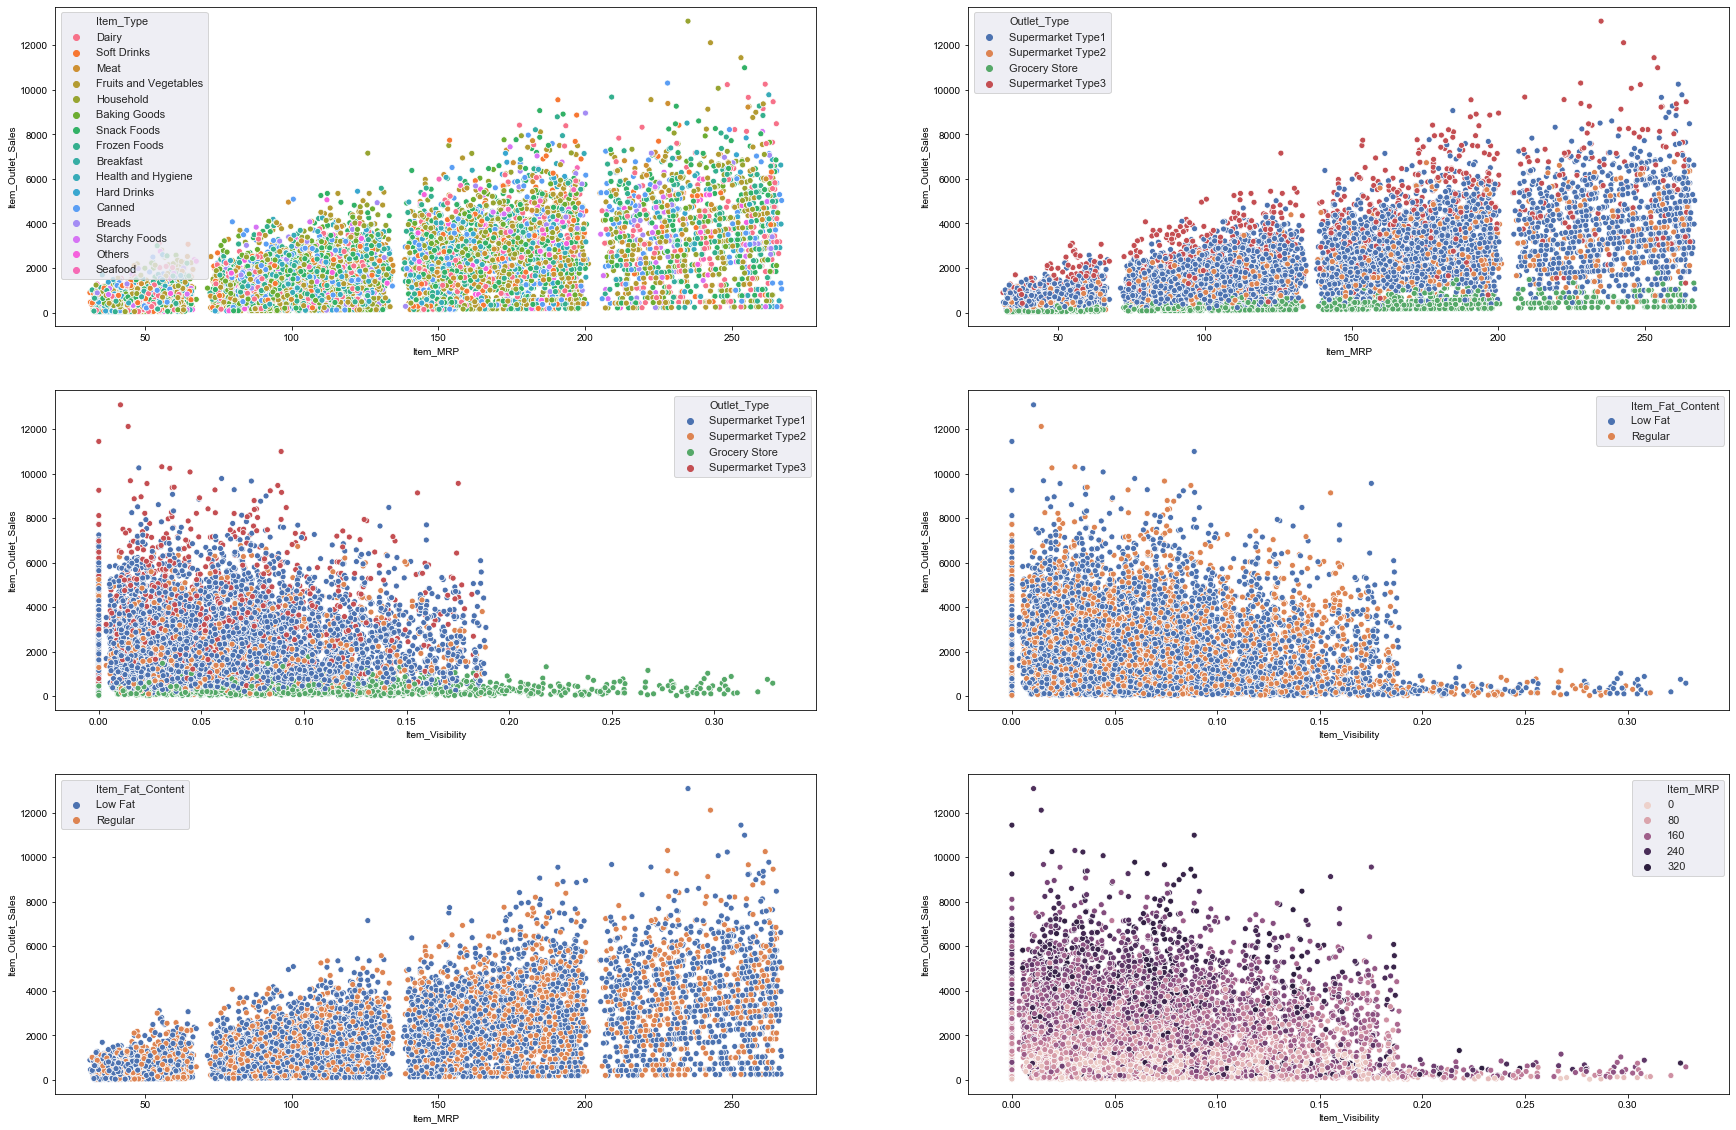

In [36]:
fig,axes=plt.subplots(3,2,figsize=(30,20))
sns.set(font_scale=1)
sns.scatterplot(x='Item_MRP',y='Item_Outlet_Sales',hue='Item_Type',data=train_data,ax=axes[0][0])

sns.scatterplot(x='Item_MRP',y='Item_Outlet_Sales',hue='Outlet_Type',data=train_data,ax=axes[0][1])

sns.scatterplot(x='Item_Visibility',y='Item_Outlet_Sales',hue='Outlet_Type',data=train_data,ax=axes[1][0])

sns.scatterplot(x='Item_Visibility',y='Item_Outlet_Sales',hue='Item_Fat_Content',data=train_data,ax=axes[1][1])

sns.scatterplot(x='Item_MRP',y='Item_Outlet_Sales',hue='Item_Fat_Content',data=train_data,ax=axes[2][0])

sns.scatterplot(x='Item_Visibility',y='Item_Outlet_Sales',hue='Item_MRP',data=train_data,ax=axes[2][1])

plt.show()

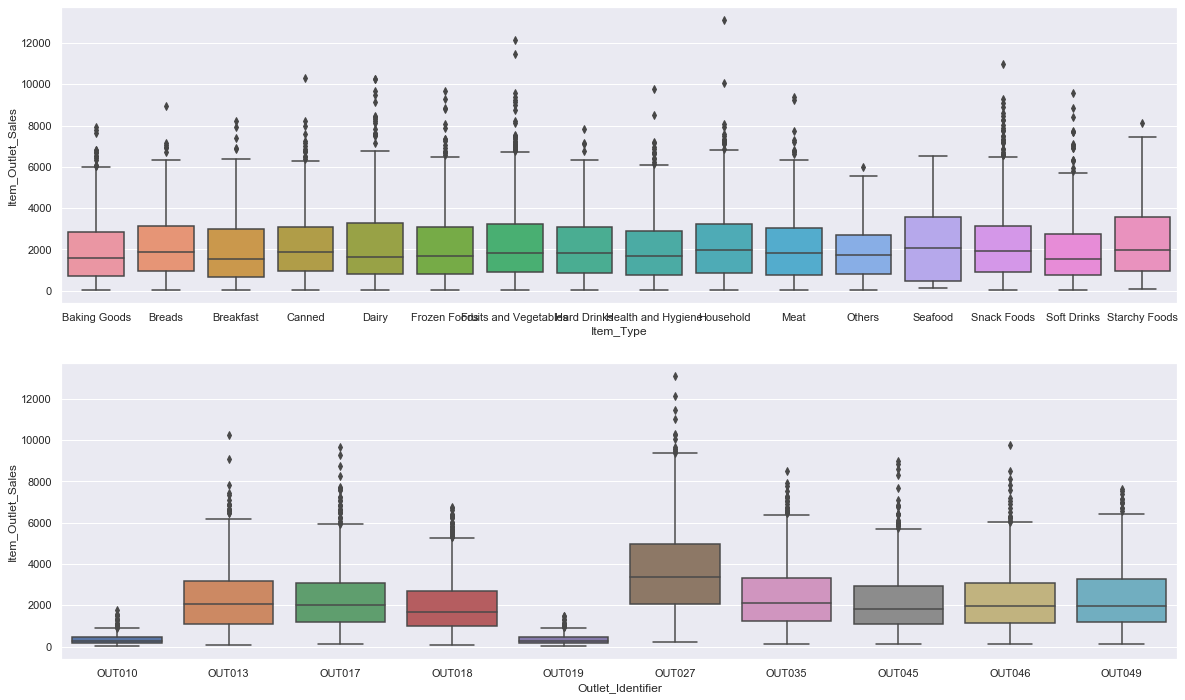

In [37]:
fig,axes=plt.subplots(2,1,figsize=(20,12))

sns.boxplot(x='Item_Type',y='Item_Outlet_Sales',ax=axes[0],data=train_data)

sns.boxplot(x='Outlet_Identifier',y='Item_Outlet_Sales',ax=axes[1],data=train_data)

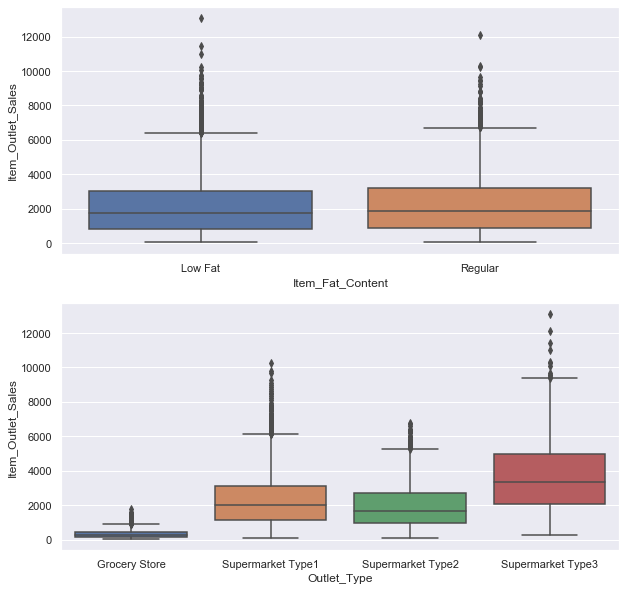

In [38]:
fig,axes = plt.subplots(2,1,figsize=(10,10))

sns.boxplot(x='Item_Fat_Content',y='Item_Outlet_Sales',ax=axes[0],data=train_data)

sns.boxplot(x='Outlet_Type',y='Item_Outlet_Sales',ax=axes[1],data=train_data)

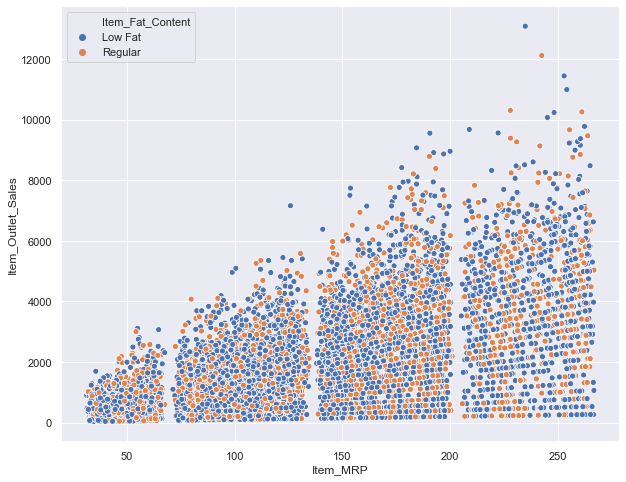

In [39]:
fig,axes=plt.subplots(1,1,figsize=(10,8))
sns.scatterplot(x='Item_MRP',y='Item_Outlet_Sales',hue='Item_Fat_Content',data=train_data)
plt.show()

In the above graph we see that the MRP is divided in bins so lets convert MRP from continous to categorical

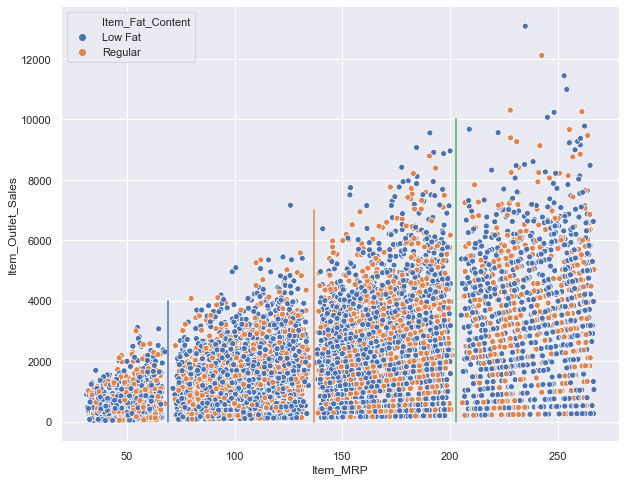

In [40]:
fig,axes=plt.subplots(1,1,figsize=(10,8))
sns.scatterplot(x='Item_MRP',y='Item_Outlet_Sales',hue='Item_Fat_Content',data=train_data)
plt.plot([69,69],[0,4000])
plt.plot([137,137],[0,7000])
plt.plot([203,203],[0,10000])
plt.show()

In [41]:
train_data.Item_MRP=pd.cut(train_data.Item_MRP,bins=[25,69,137,203,270],labels=['a','b','c','d'],right=True)

In [42]:
train_data.head()

,Item_Identifier,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,Low Fat,0.016047,Dairy,d,OUT049,1999,Tier 1,Supermarket Type1,3736.1380
1,FDA15,Low Fat,0.016047,Dairy,d,OUT049,1999,Tier 1,Supermarket Type1,3735.1380
2,DRC01,Regular,0.019278,Soft Drinks,a,OUT018,2009,Tier 3,Supermarket Type2,443.4228
3,FDN15,Low Fat,0.016760,Meat,c,OUT049,1999,Tier 1,Supermarket Type1,2097.2700
4,FDX07,Regular,0.000000,Fruits and Vegetables,c,OUT010,1998,Tier 3,Grocery Store,732.3800


In [43]:
train_data.describe()

,Item_Visibility,Outlet_Establishment_Year,Item_Outlet_Sales
count,8524.000000,8524.000000,8524.000000
mean,0.066126,1997.832004,2181.471322
std,0.051598,8.371279,1706.482603
min,0.000000,1985.000000,33.290000
25%,0.026985,1987.000000,834.580300
50%,0.053928,1999.000000,1794.331000
75%,0.094576,2004.000000,3101.296400
max,0.328391,2009.000000,13086.964800


In [44]:
train_data['Item_Visibility'] = train_data['Item_Visibility'].replace(0,np.nan)#first fill by nam for simplicity
train_data['Item_Visibility'] = train_data['Item_Visibility'].fillna(train_data.groupby('Item_Identifier')['Item_Visibility'].transform('mean'))

In [45]:
train_data.describe()

,Item_Visibility,Outlet_Establishment_Year,Item_Outlet_Sales
count,8524.000000,8524.000000,8524.000000
mean,0.070743,1997.832004,2181.471322
std,0.050313,8.371279,1706.482603
min,0.003575,1985.000000,33.290000
25%,0.031389,1987.000000,834.580300
50%,0.058096,1999.000000,1794.331000
75%,0.098844,2004.000000,3101.296400
max,0.328391,2009.000000,13086.964800


In [46]:
train_data['Item_Type_Combined'] = train_data['Item_Identifier'].apply(lambda x: x[0:2])
#Rename them to more intuitive categories:
train_data['Item_Type_Combined'] = train_data['Item_Type_Combined'].map({'FD':'Food',
                                                             'NC':'Non-Consumable',
                                                             'DR':'Drinks'})
train_data['Item_Type_Combined'].value_counts()

Food              6126
Non-Consumable    1599
Drinks             799
Name: Item_Type_Combined, dtype: int64

In [47]:
train_data['Outlet_Years'] = 2020 - train_data['Outlet_Establishment_Year']
train_data['Outlet_Years'].describe()

count    8524.000000
mean       22.167996
std         8.371279
min        11.000000
25%        16.000000
50%        21.000000
75%        33.000000
max        35.000000
Name: Outlet_Years, dtype: float64

In [48]:
train_data.Item_Type_Combined  =train_data.Item_Type_Combined.astype('category')

In [49]:
train_data['Item_Fat_Content'] = train_data['Item_Fat_Content'].cat.add_categories('Non-Edible')

In [50]:
train_data.loc[train_data['Item_Type_Combined']=="Non-Consumable",'Item_Fat_Content'] = "Non-Edible"
train_data['Item_Fat_Content'].value_counts()

Low Fat       3919
Regular       3006
Non-Edible    1599
Name: Item_Fat_Content, dtype: int64

In [51]:
mean_visibility=train_data['Item_Visibility'].mean()
train_data['Item_Visibility_MeanRatio']=train_data.apply(lambda x:x['Item_Visibility']/mean_visibility,axis=1)

Text(0, 0.5, 'Count')

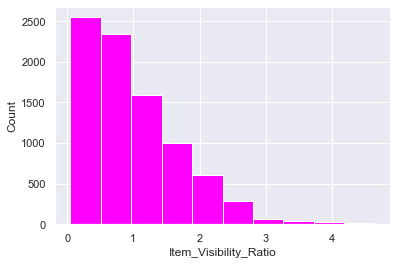

In [52]:
plt.hist(train_data.Item_Visibility_MeanRatio,color="magenta")
plt.xlabel("Item_Visibility_Ratio")
plt.ylabel("Count")

In [53]:
from scipy.stats import normaltest
k23, p3 = normaltest(train_data.Item_Visibility_MeanRatio)
print(f'P-value : {p3}')

P-value : 0.0


In [54]:
train_data['Item_Visibility_MeanRatio'] = train_data.Item_Visibility_MeanRatio.apply(lambda x: np.log(x))

Text(0, 0.5, 'Count')

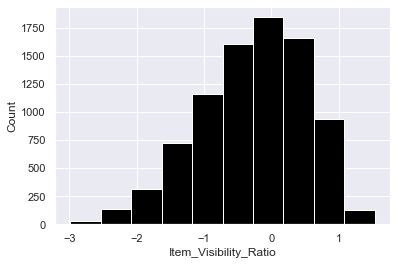

In [55]:
plt.hist(train_data.Item_Visibility_MeanRatio,color="black")
plt.xlabel("Item_Visibility_Ratio")
plt.ylabel("Count")

In [56]:
train_data.head()

,Item_Identifier,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Type_Combined,Outlet_Years,Item_Visibility_MeanRatio
0,FDA15,Low Fat,0.016047,Dairy,d,OUT049,1999,Tier 1,Supermarket Type1,3736.1380,Food,21,-1.483511
1,FDA15,Low Fat,0.016047,Dairy,d,OUT049,1999,Tier 1,Supermarket Type1,3735.1380,Food,21,-1.483511
2,DRC01,Regular,0.019278,Soft Drinks,a,OUT018,2009,Tier 3,Supermarket Type2,443.4228,Drinks,11,-1.300075
3,FDN15,Low Fat,0.016760,Meat,c,OUT049,1999,Tier 1,Supermarket Type1,2097.2700,Food,21,-1.440052
4,FDX07,Regular,0.022911,Fruits and Vegetables,c,OUT010,1998,Tier 3,Grocery Store,732.3800,Food,22,-1.127455


In [58]:
from sklearn.preprocessing import MinMaxScaler
numpy_array = np.array(train_data.Item_Visibility_MeanRatio).reshape(-1,1)

visibilitiy_sc = MinMaxScaler()
train_data['Item_Visibility_MeanRatio'] = visibilitiy_sc.fit_transform(numpy_array)

<h5>Encoding all the categorical features</h5>

In [59]:
#One Hot Coding
train_data = pd.get_dummies(train_data, columns=['Item_MRP','Item_Fat_Content','Outlet_Location_Type'
                                                 ,'Outlet_Type','Outlet_Identifier',
                                                  'Item_Type_Combined'])

In [60]:
train_data.to_csv("./Data/EngineeredData.csv",index=False)

In [61]:
train_data = pd.read_csv("./Data/EngineeredData.csv")

In [62]:
train_data.shape

(8524, 34)

In [64]:
new_data = train_data.drop(['Item_Identifier','Item_Type','Outlet_Establishment_Year','Item_Visibility'],axis=1)

In [65]:
X = new_data.drop(['Item_Outlet_Sales'],axis=1)
y = new_data.Item_Outlet_Sales.values

In [66]:
X.shape

(8524, 29)

<h5>Statistical Approach</h5>

In [67]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from numpy import set_printoptions

test = SelectKBest(score_func=f_regression, k=15)
fit = test.fit(X, y)

print(fit.scores_)
statistical_features = fit.transform(X)

[2.06093800e+01 7.28487472e+01 1.31724176e+03 4.71214218e+02
 3.34483563e+02 1.57091817e+03 7.40439499e-01 2.96139849e+00
 1.01487284e+00 1.06491076e+02 2.89465872e+01 1.82968020e+01
 1.73970064e+03 1.02152217e+02 1.23845518e+01 9.13406908e+02
 7.52794334e+02 4.96539810e+00 9.05042680e+00 1.23845518e+01
 7.09681622e+02 9.13406908e+02 2.38084110e+01 4.26388055e-02
 3.33028232e+00 1.01857639e+01 1.02765470e+01 8.71891707e+00
 1.01487284e+00]


In [68]:
list_form = list(fit.scores_)
res = sorted(range(len(list_form)), key = lambda sub: list_form[sub])[-15:] 
temp = X.iloc[:,res]

In [69]:
temp.columns

Index(['Outlet_Years', 'Outlet_Identifier_OUT035',
       'Outlet_Location_Type_Tier 2', 'Item_Visibility_MeanRatio',
       'Outlet_Type_Supermarket Type1', 'Outlet_Location_Type_Tier 1',
       'Item_MRP_c', 'Item_MRP_b', 'Outlet_Identifier_OUT019',
       'Outlet_Identifier_OUT010', 'Outlet_Type_Supermarket Type3',
       'Outlet_Identifier_OUT027', 'Item_MRP_a', 'Item_MRP_d',
       'Outlet_Type_Grocery Store'],
      dtype='object')

<h5>Recursive Feature Elimination Approach</h5>

In [70]:
from sklearn.feature_selection import RFE

from sklearn.tree import DecisionTreeRegressor
algo = DecisionTreeRegressor(max_depth=15, min_samples_leaf=100)

rfe = RFE(algo, 15)

fit = rfe.fit(X, y)

print(f"Num Features: {fit.n_features_}")
print(f"\nSelected Features:\n {fit.support_}")

Num Features: 15

Selected Features:
 [ True  True  True  True  True  True  True  True  True  True False  True
  True False  True  True False False False False False False False  True
 False False False False False]


In [71]:
feature_columns = []
for index,value in enumerate(fit.support_):
    if value == True:
        feature_columns.append(X.columns[index])
        
rfe_features = X[feature_columns]

In [72]:
rfe_features.columns

Index(['Outlet_Years', 'Item_Visibility_MeanRatio', 'Item_MRP_a', 'Item_MRP_b',
       'Item_MRP_c', 'Item_MRP_d', 'Item_Fat_Content_Low Fat',
       'Item_Fat_Content_Regular', 'Item_Fat_Content_Non-Edible',
       'Outlet_Location_Type_Tier 1', 'Outlet_Location_Type_Tier 3',
       'Outlet_Type_Grocery Store', 'Outlet_Type_Supermarket Type2',
       'Outlet_Type_Supermarket Type3', 'Outlet_Identifier_OUT045'],
      dtype='object')

<h5>Feature Importance Approach</h5>

In [73]:
from sklearn.ensemble import ExtraTreesRegressor

model = ExtraTreesRegressor(n_estimators=10)
model.fit(X, y)
print(model.feature_importances_)

[5.67622939e-03 3.84283265e-01 6.93558044e-05 2.98385359e-02
 1.34899742e-01 1.66563266e-01 4.95610709e-03 5.52679121e-03
 1.99525515e-03 1.35045907e-03 1.06216120e-03 8.66928437e-04
 1.69723933e-01 1.48507720e-03 1.33556364e-03 4.61467044e-02
 1.16287103e-05 1.01528146e-03 1.22039253e-03 6.18761733e-04
 1.11486709e-05 2.89119882e-02 1.67660814e-03 1.12378606e-03
 9.78555163e-04 1.23302907e-03 2.21069900e-03 3.50275251e-03
 1.70599382e-03]


In [74]:
list_form = list(model.feature_importances_)
res = sorted(range(len(list_form)), key = lambda sub: list_form[sub])[-15:] 
fe_features = X.iloc[:,res]

In [75]:
fe_features.columns

Index(['Outlet_Identifier_OUT035', 'Item_Type_Combined_Non-Consumable',
       'Item_Fat_Content_Non-Edible', 'Item_Type_Combined_Drinks',
       'Item_Type_Combined_Food', 'Item_Fat_Content_Low Fat',
       'Item_Fat_Content_Regular', 'Outlet_Years', 'Outlet_Identifier_OUT027',
       'Item_MRP_b', 'Outlet_Type_Supermarket Type3', 'Item_MRP_c',
       'Item_MRP_d', 'Outlet_Type_Grocery Store', 'Item_Visibility_MeanRatio'],
      dtype='object')

<h5>Ranking Approach</h5>

In [76]:
scoring_map = {}
score = 10
for i in range(len(temp.columns)):  
    if temp.columns[i] not in scoring_map.keys():
        scoring_map[temp.columns[i]] = score
    else:
        scoring_map[temp.columns[i]]+= score
    score-=1
    
score = 10
for i in range(len(fe_features.columns)):  
    if fe_features.columns[i] not in scoring_map.keys():
        scoring_map[fe_features.columns[i]] = score
    else:
        scoring_map[fe_features.columns[i]]+= score
    score-=1
    
print(scoring_map)

import heapq
new_features = heapq.nlargest(5, scoring_map, key=scoring_map.get)

print(f'New Selected Features are : {new_features}')

{'Outlet_Years': 13, 'Outlet_Identifier_OUT035': 19, 'Outlet_Location_Type_Tier 2': 8, 'Item_Visibility_MeanRatio': 3, 'Outlet_Type_Supermarket Type1': 6, 'Outlet_Location_Type_Tier 1': 5, 'Item_MRP_c': 3, 'Item_MRP_b': 4, 'Outlet_Identifier_OUT019': 2, 'Outlet_Identifier_OUT010': 1, 'Outlet_Type_Supermarket Type3': 0, 'Outlet_Identifier_OUT027': 1, 'Item_MRP_a': -2, 'Item_MRP_d': -5, 'Outlet_Type_Grocery Store': -7, 'Item_Type_Combined_Non-Consumable': 9, 'Item_Fat_Content_Non-Edible': 8, 'Item_Type_Combined_Drinks': 7, 'Item_Type_Combined_Food': 6, 'Item_Fat_Content_Low Fat': 5, 'Item_Fat_Content_Regular': 4}
New Selected Features are : ['Outlet_Identifier_OUT035', 'Outlet_Years', 'Item_Type_Combined_Non-Consumable', 'Outlet_Location_Type_Tier 2', 'Item_Fat_Content_Non-Edible']


In [77]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train,y_test = train_test_split(fe_features,y,test_size=0.2)

In [78]:
X_train.shape, X_test.shape

((6819, 15), (1705, 15))

In [81]:
import numpy as np
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [82]:
from sklearn.linear_model import LinearRegression

alg1 = LinearRegression(normalize=True)
alg1.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [83]:
predicts = alg1.predict(X_test)
import math
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
print(f'RMSE For Linear Regression:= {math.sqrt(mean_squared_error(predicts,y_test))}')
print(f'R2 score for Linear Regression:= {r2_score(predicts,y_test)}')
print(f'MAPE for Linear Regression:= {mean_absolute_percentage_error(predicts,y_test)}')

RMSE For Linear Regression:= 1170.605390324064
R2 score for Linear Regression:= 0.07553441839352482
MAPE for Linear Regression:= 48.0838961222658


In [84]:
from sklearn.linear_model import Ridge, Lasso
alg2 = Ridge(normalize=True)
alg3 = Lasso(normalize=True)

alg2.fit(X_train,y_train)
alg3.fit(X_train,y_train)

predicts_Ridge = alg2.predict(X_test)
predicts_Lasso = alg3.predict(X_test)
import math
from sklearn.metrics import mean_squared_error, mean_absolute_error
print(f'RMSE For Ridge Regression:= {math.sqrt(mean_squared_error(predicts_Ridge,y_test))}')
print(f'R2 score for Ridge Regression:= {r2_score(predicts_Ridge,y_test)}')
print(f'MAPE for Ridge Regression:= {mean_absolute_percentage_error(predicts_Ridge,y_test)}')
print('*********************************************************************')
print(f'RMSE For Lasso Regression:= {math.sqrt(mean_squared_error(predicts_Lasso,y_test))}')
print(f'R2 score for Lasso Regression:= {r2_score(predicts_Lasso,y_test)}')
print(f'MAPE for Lasso Regression:= {mean_absolute_percentage_error(predicts_Lasso,y_test)}')

RMSE For Ridge Regression:= 1373.3427653760536
R2 score for Ridge Regression:= -3.732718999401503
MAPE for Ridge Regression:= 49.662445542321585
*********************************************************************
RMSE For Lasso Regression:= 1214.2630992193597
R2 score for Lasso Regression:= -0.39996609974842645
MAPE for Lasso Regression:= 55.25345884310136


In [85]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
dec_tree = DecisionTreeRegressor(max_depth=8)
alg4 = GridSearchCV(dec_tree,
                   {'max_depth': [2, 4, 6, 8]}, verbose=1)

random = RandomForestRegressor(max_depth=8)
alg5 = GridSearchCV(random,
                   {'max_depth': [2, 4, 6, 8],
                    'n_estimators': [50, 100, 200]}, verbose=1)

svrRBF = SVR()
alg6 = GridSearchCV(svrRBF,
                   {'kernel': ['rbf'], 
                    'gamma': [1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]}, verbose=1)
svrLinear = SVR()
alg7 = GridSearchCV(svrLinear,
                   {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}, verbose=1)

alg4.fit(X_train,y_train)
alg5.fit(X_train,y_train)
alg6.fit(X_train,y_train)
alg7.fit(X_train,y_train)

predicts_Deci = alg4.predict(X_test)
predicts_Ran = alg5.predict(X_test)
predicts_SVR = alg6.predict(X_test)
predicts_SVRLinear = alg7.predict(X_test)
import math
from sklearn.metrics import mean_squared_error, mean_absolute_error
print(f'RMSE For Decision Tree Regression:= {math.sqrt(mean_squared_error(predicts_Deci,y_test))}')
print(f'R2 score for Decision Tree Regression:= {r2_score(predicts_Deci,y_test)}')
print(f'MAPE for Decision Tree Regression:= {mean_absolute_percentage_error(predicts_Deci,y_test)}')
print('*********************************************************************')
print(f'RMSE For Random Forest Regression:= {math.sqrt(mean_squared_error(predicts_Ran,y_test))}')
print(f'R2 score for Random Forest Regression:= {r2_score(predicts_Ran,y_test)}')
print(f'MAPE for Random Forest Regression:= {mean_absolute_percentage_error(predicts_Ran,y_test)}')
print('*********************************************************************')
print(f'RMSE For SVR (RBF) Regression:= {math.sqrt(mean_squared_error(predicts_SVR,y_test))}')
print(f'R2 score for SVR (RBF) Regression:= {r2_score(predicts_SVR,y_test)}')
print(f'MAPE for SVR (RBF) Regression:= {mean_absolute_percentage_error(predicts_SVR,y_test)}')
print('*********************************************************************')
print(f'RMSE For SVR (Linear) Regression:= {math.sqrt(mean_squared_error(predicts_SVRLinear,y_test))}')
print(f'R2 score for SVR (Linear) Regression:= {r2_score(predicts_SVRLinear,y_test)}')
print(f'MAPE for SVR (Linear) Regression:= {mean_absolute_percentage_error(predicts_SVRLinear,y_test)}')

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:   37.8s finished


Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:  1.2min finished


Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:   32.9s finished


RMSE For Decision Tree Regression:= 1137.1208818840219
R2 score for Decision Tree Regression:= 0.23871204526209455
MAPE for Decision Tree Regression:= 38.89937602518731
*********************************************************************
RMSE For Random Forest Regression:= 1130.8016067902652
R2 score for Random Forest Regression:= 0.2536493845297523
MAPE for Random Forest Regression:= 38.5651590155654
*********************************************************************
RMSE For SVR (RBF) Regression:= 1449.7640921179284
R2 score for SVR (RBF) Regression:= -4.623906239623264
MAPE for SVR (RBF) Regression:= 54.09650925952316
*********************************************************************
RMSE For SVR (Linear) Regression:= 1206.1433835179525
R2 score for SVR (Linear) Regression:= -0.2552444268406511
MAPE for SVR (Linear) Regression:= 146.76879841798385


In [86]:
print(f'Best For Decision tree : {alg4.best_params_}')
print(f'Best For Random Forest tree : {alg5.best_params_}')
print(f'Best For SVR RBF : {alg6.best_params_}')
print(f'Best For SVR Linear  : {alg7.best_params_}')

Best For Decision tree : {'max_depth': 6}
Best For Random Forest tree : {'max_depth': 6, 'n_estimators': 200}
Best For SVR RBF : {'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}
Best For SVR Linear  : {'C': 1000, 'kernel': 'linear'}


In [87]:
import xgboost as xgb 

xgb_model = xgb.XGBRegressor()

clf = GridSearchCV(xgb_model,
                   {'max_depth': [2, 4, 6],
                    'n_estimators': [50, 100, 200]}, verbose=1)

clf.fit(X_train,y_train)

xgbRpredicts = clf.predict(X_test)
print(f'RMSE For XG Boost Regression:= {math.sqrt(mean_squared_error(xgbRpredicts,y_test))}')
print(f'R2 score for XG Boost Regression:= {r2_score(xgbRpredicts,y_test)}')
print(f'MAPE for XG Boost Regression:= {mean_absolute_percentage_error(xgbRpredicts,y_test)}')

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:   22.8s finished


RMSE For XG Boost Regression:= 1127.0412508440825
R2 score for XG Boost Regression:= 0.21933166891480127
MAPE for XG Boost Regression:= 40.12584548190847


In [88]:
print(f'Best For XGB tree : {clf.best_params_}')

Best For XGB tree : {'max_depth': 2, 'n_estimators': 100}


In [89]:
import pickle
with open("./Data/RandomForest.pickle","wb") as file:
    pickle.dump(alg5, file)